In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root")
f.cd()
f.ls()

TFile**		./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
 TFile*		./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
  KEY: TH3D	corrected;1	corrected


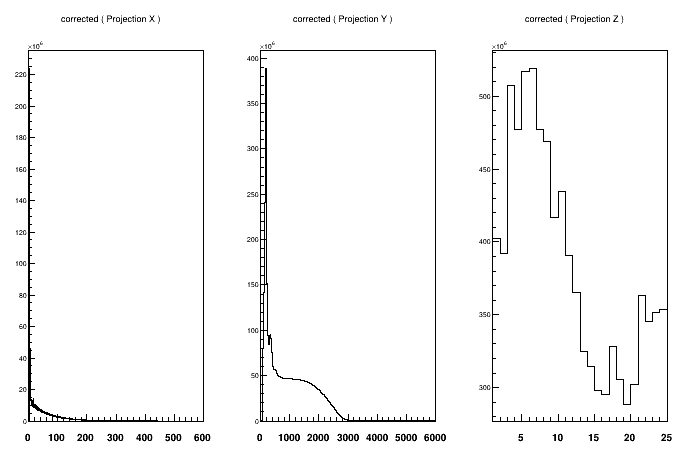

In [3]:
c = r.TCanvas()
c.Divide(3,1)
c.cd(1)
timehist = f.corrected.ProjectionX() #time (us)
timehist.Draw()
c.cd(2)
energyhist = f.corrected.ProjectionY() #energy (MeV)
energyhist.Draw()
c.cd(3)
calohist = f.corrected.ProjectionZ() # calonum
calohist.Draw()
c.Draw()

In [4]:
nbins = calohist.GetXaxis().GetNbins()
calolist = []
for i in range(0,nbins):
    ding = int(calohist.GetBinCenter(i) + calohist.GetBinWidth(i)/2)
    calolist.append(ding)
print(calolist)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


[<ROOT.TH1D object ("px_cut") at 0x7fffddebc280>, <ROOT.TH1D object ("px_cut") at 0x7fffde1af7b0>, <ROOT.TH1D object ("px_cut") at 0x7fffd8f33e00>, <ROOT.TH1D object ("px_cut") at 0x7fffde1aaf00>, <ROOT.TH1D object ("px_cut") at 0x7fffde1b0a60>, <ROOT.TH1D object ("px_cut") at 0x7fffde18ccb0>, <ROOT.TH1D object ("px_cut") at 0x7fffde1b7810>, <ROOT.TH1D object ("px_cut") at 0x7fffde1ae1e0>, <ROOT.TH1D object ("px_cut") at 0x7fffde1b7e50>, <ROOT.TH1D object ("px_cut") at 0x7fffde19dd50>, <ROOT.TH1D object ("px_cut") at 0x7fffde1b8650>, <ROOT.TH1D object ("px_cut") at 0x7fffde1afd60>, <ROOT.TH1D object ("px_cut") at 0x7fffde1b01c0>, <ROOT.TH1D object ("px_cut") at 0x7fffde1a6c10>, <ROOT.TH1D object ("px_cut") at 0x7fffde1a70b0>, <ROOT.TH1D object ("px_cut") at 0x7fffde1ab7e0>, <ROOT.TH1D object ("px_cut") at 0x7fffde1aa050>, <ROOT.TH1D object ("px_cut") at 0x7fffde1aa4b0>, <ROOT.TH1D object ("px_cut") at 0x7fffde1611a0>, <ROOT.TH1D object ("px_cut") at 0x7fffde161600>, <ROOT.TH1D object (

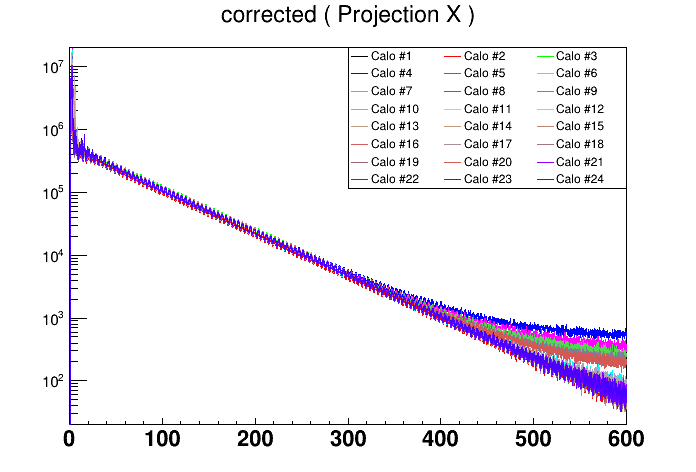

In [5]:
singleCaloEnergyList = []
c = r.TCanvas()
c.SetLogy()
leg = r.TLegend(0.5,0.6,0.9,0.9)
leg.SetNColumns(3)
for i in range(0,len(calolist)):
    h2 = f.corrected.ProjectionX("px_cut",0,-1,i+1,i+1,"")
    h2.SetLineColor(i+1)
    if i >= 4:
        h2.SetLineColor(2+i)
    if i>= 8:
        h2.SetLineColor(31+i)
    ding = h2.Clone()
    if i == 0:
        ding.Draw()
    else:
        ding.Draw("SAME")
    singleCaloEnergyList.append(ding)
print(singleCaloEnergyList)
for i in range(0,len(singleCaloEnergyList)):
    leg.AddEntry(singleCaloEnergyList[i],"Calo #" + str(calolist[i]),"l")
leg.Draw("SAME")
c.Draw()

In [6]:
for j in range(0,600,200):
    energylistj = []
    for i in range(0, len(singleCaloEnergyList)):
        energybin = singleCaloEnergyList[i].FindBin(j)
        ding = singleCaloEnergyList[i].GetBinContent(energybin)
        energylistj.append(ding)
#    print(energylistj)
    plt.plot(energylistj)
    plt.title(str(j)+" Microseconds")
    plt.ylabel('# of Counts')
    plt.xlabel('Calorimeter Number - 1')
#    plt.show()
    plt.savefig('./caloEnergyTime/'+str(format(j,'0>3'))+'_noCut.png', bbox_inches='tight')
    plt.close()

In [7]:
print(energylistj)

[1226.0310276142197, 981.0197407101095, 1273.0333181384187, 1708.059558854674, 1494.0455548255386, 1202.0295028249739, 1463.0438194982146, 1204.0295053254501, 1256.0322140917342, 1312.0353093519043, 1095.0243969687976, 1165.0277572806717, 1149.0274916998417, 1206.0296099031161, 1103.0247395771198, 1184.0282195824693, 1128.0259673330143, 1249.0320444257345, 1201.0293950834584, 1381.040000660581, 1183.0286766545541, 1103.0252485780982, 1194.0289300596264, 1207.0302073594764]


Now lets look at what happens when we introduce an energy cut into the mix.

101 201
[<ROOT.TH1D object ("px_cut") at 0x7fffde1a8c70>, <ROOT.TH1D object ("px_cut") at 0x7fffde1a9060>, <ROOT.TH1D object ("px_cut") at 0x7fffde2e13c0>, <ROOT.TH1D object ("px_cut") at 0x7fffde2e17b0>, <ROOT.TH1D object ("px_cut") at 0x7fffde2e1ba0>, <ROOT.TH1D object ("px_cut") at 0x7fffde453390>, <ROOT.TH1D object ("px_cut") at 0x7fffde453780>, <ROOT.TH1D object ("px_cut") at 0x7fffde453b70>, <ROOT.TH1D object ("px_cut") at 0x7fffde453f60>, <ROOT.TH1D object ("px_cut") at 0x7fffde59b1d0>, <ROOT.TH1D object ("px_cut") at 0x7fffde59b5c0>, <ROOT.TH1D object ("px_cut") at 0x7fffde59b9b0>, <ROOT.TH1D object ("px_cut") at 0x7fffde59bda0>, <ROOT.TH1D object ("px_cut") at 0x7fffde5abc10>, <ROOT.TH1D object ("px_cut") at 0x7fffde5ac000>, <ROOT.TH1D object ("px_cut") at 0x7fffde5ac3f0>, <ROOT.TH1D object ("px_cut") at 0x7fffde5ac7e0>, <ROOT.TH1D object ("px_cut") at 0x7fffde624c90>, <ROOT.TH1D object ("px_cut") at 0x7fffde625080>, <ROOT.TH1D object ("px_cut") at 0x7fffde625470>, <ROOT.TH1D 

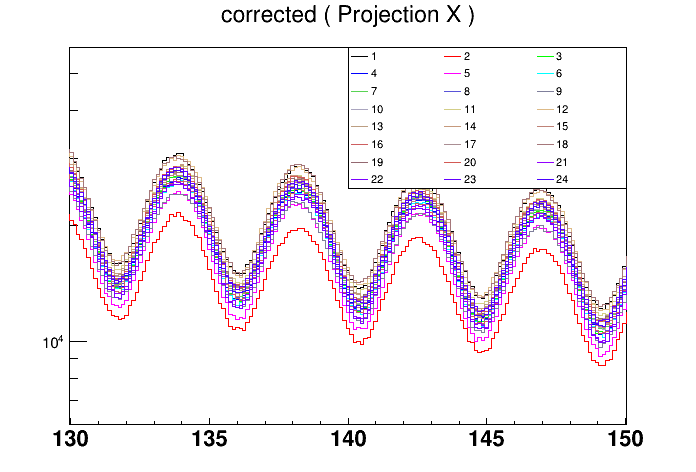

In [8]:
minenergybin = energyhist.FindBin(1500) #try switching from 1000 -> 1500 
maxenergybin = energyhist.FindBin(3000)
print(minenergybin,maxenergybin)

singleCaloEnergyCutList = []
c = r.TCanvas()
c.SetLogy()
leg = r.TLegend(0.5,0.6,0.9,0.9)
leg.SetNColumns(3)
for i in range(0,len(calolist)):
    h2 = f.corrected.ProjectionX("px_cut",minenergybin,maxenergybin,i+1,i+1,"")
    h2.SetLineColor(i+1)
    if i >= 4:
        h2.SetLineColor(2+i)
    if i>= 8:
        h2.SetLineColor(31+i)
    ding = h2.Clone()
    if i == 0:
        ding.GetXaxis().SetRangeUser(130,150)
        ding.Draw()
    else:
        ding.Draw("SAME")
    singleCaloEnergyCutList.append(ding)
print(singleCaloEnergyCutList)
for i in range(0,len(singleCaloEnergyCutList)):
    leg.AddEntry(singleCaloEnergyCutList[i],str(calolist[i]),"l")
leg.Draw("SAME")
c.Draw()

[20209.678905007873, 14442.940336603118, 18085.19891501191, 18064.122134035057, 16423.089461961496, 17424.242274368444, 18439.452373768003, 17692.163124523897, 16514.36485246352, 18505.633699449227, 19537.46628291465, 20496.9400795204, 19238.656270248903, 19299.454043195175, 18318.89211872675, 17287.58705360764, 18482.647667475474, 20402.677849370782, 18501.284560395026, 18720.805634717202, 17417.514460925944, 17063.416333861405, 18808.14063621089, 18166.79499707364]


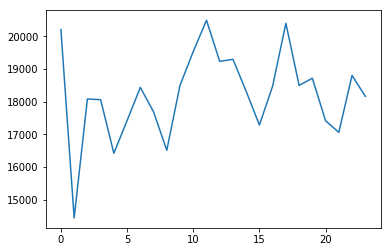

In [9]:
caloOscList = []
for i in range(0,len(calolist)):
    energyBin137 = singleCaloEnergyCutList[i].FindBin(137)
    caloOscList.append(singleCaloEnergyCutList[i].GetBinContent(energyBin137))
print(caloOscList)
plt.plot(caloOscList)
plt.show()

In [10]:
for j in range(0,600,2):
    energylistj = []
    for i in range(0, len(singleCaloEnergyCutList)):
        energybin = singleCaloEnergyCutList[i].FindBin(j)
        ding = singleCaloEnergyCutList[i].GetBinContent(energybin)
        energylistj.append(ding)
    plt.plot(energylistj)
    plt.title(str(j)+" Microseconds")
    plt.ylabel('# of Counts')
    plt.xlabel('Calorimeter Number - 1')
#    plt.show()
    plt.savefig('./caloEnergyTime/'+str(format(j,'0>3'))+'_cut.png', bbox_inches='tight')
    plt.close()

Now we can create a comparison plot which shows the cut and uncut plots side by side

In [11]:
for j in range(0,600,2):
    energylistj = []
    energylistjuncut = []
    for i in range(0, len(singleCaloEnergyCutList)):
        energybin = singleCaloEnergyCutList[i].FindBin(j)
        ding = singleCaloEnergyCutList[i].GetBinContent(energybin)
        energylistj.append(ding)
    for i in range(0,len(singleCaloEnergyList)):
        energybin = singleCaloEnergyList[i].FindBin(j)
        ding = singleCaloEnergyList[i].GetBinContent(energybin)
        energylistjuncut.append(ding)
    plt.plot(energylistj)
#    plt.plot(energylistjuncut,linestyle='dashed')
#    print(energylistjuncut)
#    print(energylistj)
    plt.title(str(j)+" Microseconds")
    plt.ylabel('# of Counts')
    plt.xlabel('Calorimeter Number - 1')
#    plt.show()
    plt.savefig('./caloEnergyTime/'+str(format(j,'0>3'))+'_cut.png', bbox_inches='tight')
    plt.close()
    if (i % 100 == 0):
        print("Time",i,"processed")

We can't see much difference on the plots. Lets now look into the actual difference between these two plots by subtracting them directly

In [12]:
differencelist = []
for j in range(50,600,200):
    print("j = ",j)
    energylistj = []
    energylistjuncut = []
    #three loops is a stupid way to do this... fix at some point
    for i in range(0, len(singleCaloEnergyCutList)):
        energybin = singleCaloEnergyCutList[i].FindBin(j)
        ding = singleCaloEnergyCutList[i].GetBinContent(energybin)
        energylistj.append(ding)
    for i in range(0, len(singleCaloEnergyList)):
        energybin = singleCaloEnergyList[i].FindBin(j)
        ding = singleCaloEnergyList[i].GetBinContent(energybin)
        energylistjuncut.append(ding)
    differencelistj = []
    for i in range(0,len(singleCaloEnergyList)):
        differencelistj.append(energylistjuncut[i] - energylistj[i])
    differencelist.append(differencelistj)
    print(differencelistj)

j =  50
[173492.65682347727, 162855.28766156445, 192270.73665143727, 181231.82530842428, 179656.49261864318, 174925.58821444795, 174794.0394774091, 175508.70532843142, 168486.3384104799, 177359.82542411267, 158682.60350109445, 159255.4313660509, 155708.31448285852, 160543.74291912693, 160012.47197533725, 164928.44599034093, 157067.67089982552, 151983.23460156954, 156122.28713937203, 160858.21810119593, 164859.25883580704, 166990.66883630928, 164635.50617577435, 173936.33251704724]
j =  250
[7329.077201017679, 6935.765006666078, 7674.216195519979, 7939.305477165779, 7580.113952902997, 7293.018506295111, 7224.976441286483, 7414.086012911555, 7387.995872800982, 7844.315018373714, 7052.907441751131, 7053.921832058316, 7101.949418256798, 7225.969630116793, 7330.023027991111, 7505.063854623824, 7276.988137016999, 7065.9150704741605, 7092.89303598187, 7560.196862745612, 7386.042713491232, 7254.008593658888, 7059.894449981035, 7597.178423301697]
j =  450
[337.0042367453982, 367.0048215567699, 

Well apparantly there is no difference... Not sure if I believe that. This is a problem with the projection cut most likely. The difference does appear for weird cuts (say only energies from 1 - 3 MeV) however.



We can also look at the 2D histogram of the energy spectrum vs. time. Lets first do the projection for all calorimeters at once and compare to a single calorimeter (here calorimeter 2 because why the heck not)

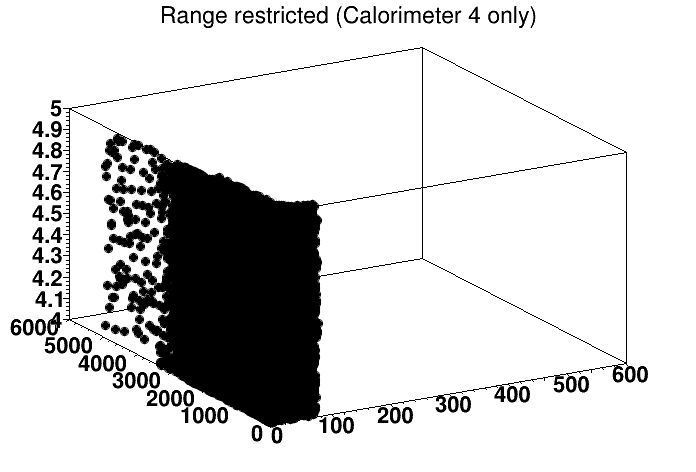

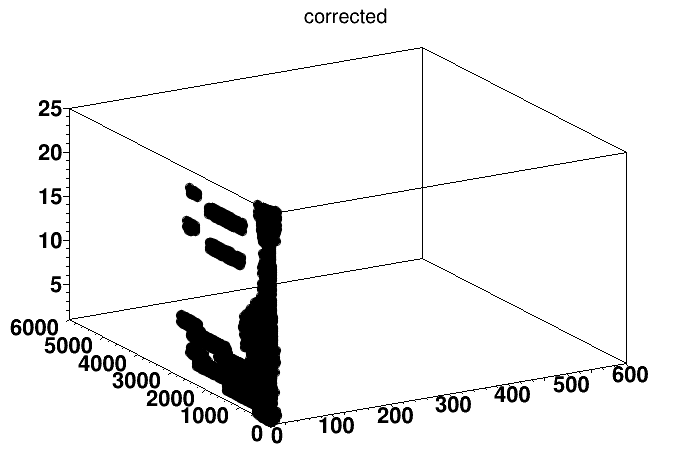

In [13]:
threedhist = f.corrected.Clone("threedhist")
c = r.TCanvas()
calonum = 4
threedhist.GetZaxis().SetRange(calonum,calonum)
threedhist.SetTitle("Range restricted (Calorimeter "+str(calonum)+" only)")
threedhist.Draw()
c.Draw()
c2 = r.TCanvas()
f.corrected.Draw()
c2.Draw()

In [14]:
energytimehistFULL = f.corrected.Project3D("yx")

energytimehist = threedhist.Project3D("yx")
energytimehist.SetTitle("Range restricted (Calorimeter "+str(calonum)+" only) yx projection")

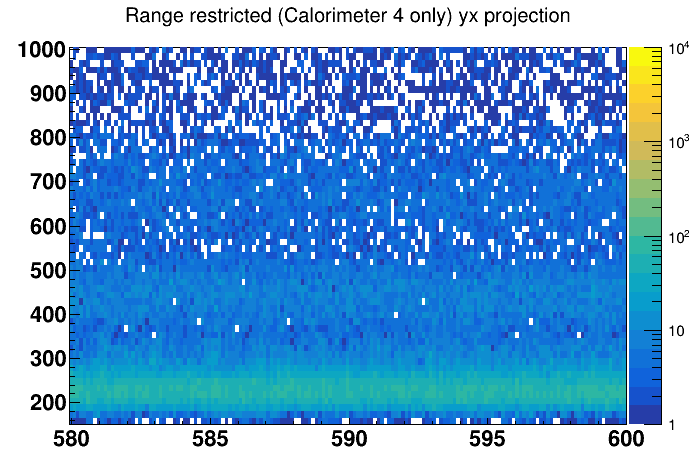

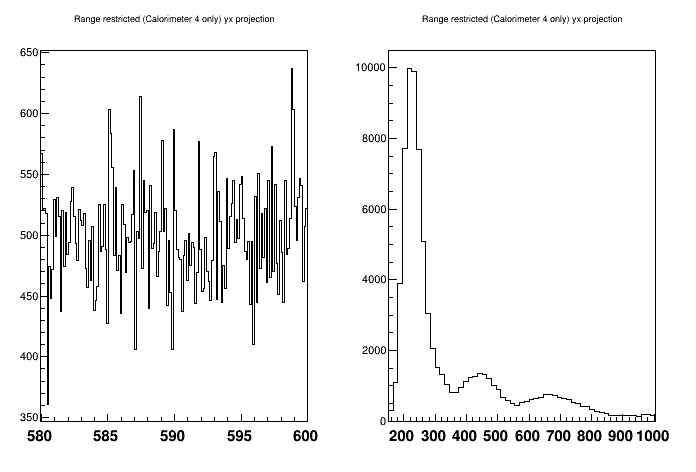

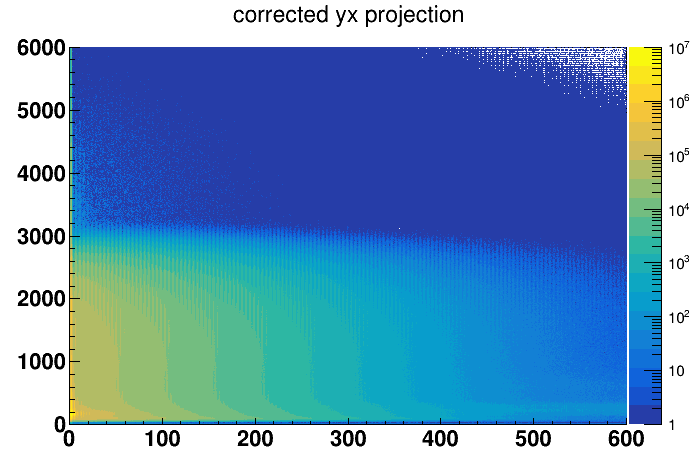

In [15]:
c2 = r.TCanvas()
energytimehist.Draw("COLZ")
c2.SetLogz()
energytimehist.GetYaxis().SetRangeUser(150,1000)
energytimehist.GetXaxis().SetRangeUser(580,600)
energytimehist.GetZaxis().SetRangeUser(1,10000)
c2.Draw()


c4 = r.TCanvas()
c4.Divide(2)
c4.cd(1)
energytimehist.ProjectionX().Draw()
c4.cd(2)
energytimehist.ProjectionY().Draw()
c4.Draw()


c3 = r.TCanvas()
energytimehistFULL.Draw("COLZ")
energytimehistFULL.GetZaxis().SetRangeUser(1,10000000)
c3.SetLogz()
c3.Draw()

<ROOT.TH2D object ("corrected_yx") at 0x7fb89e7b0e60> <ROOT.TH2D object ("threedhist_yx") at 0x7fb89e7b28d0>


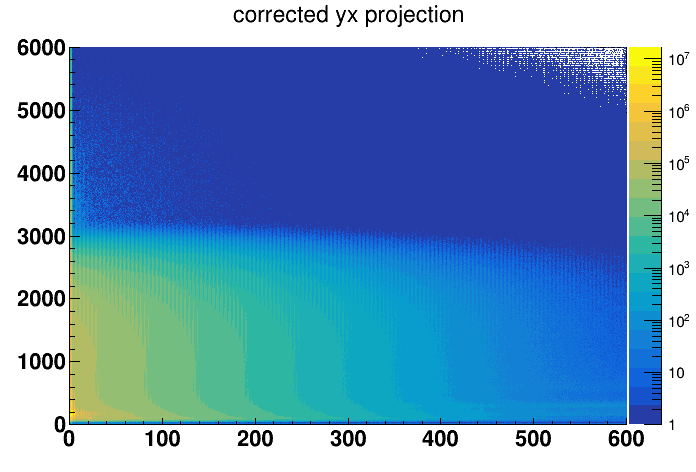

In [16]:
c4 = r.TCanvas()
ding = energytimehistFULL.Clone()
dong = energytimehist.Clone()
ding.Draw("goff")
dong.Draw("goff")
print(ding,dong)
ding.Add(dong,r.Double(-1)) #change to -1 whenever the stupid error above is taken care of
ding.Draw("COLZ")
c4.SetLogz()
c4.Draw()

Success! That was a stupid amount of work and a dasterdly error. Now lets loop over all of the calorimeter numbers and see if we can't identify a pattern which corresponds to the one we saw above.

Processing calorimeter 1
Processing calorimeter 2
Processing calorimeter 3
Processing calorimeter 4
Processing calorimeter 5
Processing calorimeter 6
Processing calorimeter 7
Processing calorimeter 8
Processing calorimeter 9
Processing calorimeter 10
Processing calorimeter 11
Processing calorimeter 12
Processing calorimeter 13
Processing calorimeter 14
Processing calorimeter 15
Processing calorimeter 16
Processing calorimeter 17
Processing calorimeter 18
Processing calorimeter 19
Processing calorimeter 20
Processing calorimeter 21
Processing calorimeter 22
Processing calorimeter 23
Processing calorimeter 24


Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_01.png has been created
Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_01_projections.png has been created
Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_02.png has been created
Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_02_projections.png has been created
Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_03.png has been created
Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_03_projections.png has been created
Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_04.png has been created
Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_04_projections.png has been created
Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_05.png has been created
Info in <TCanvas::Print>: png file ./caloEnergyTime/energy2d/calo2D_05_projections.png has been created
Info in <TCanvas::Pr

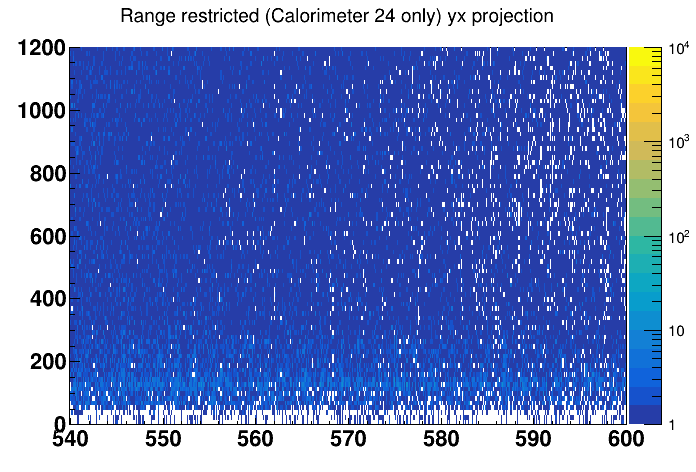

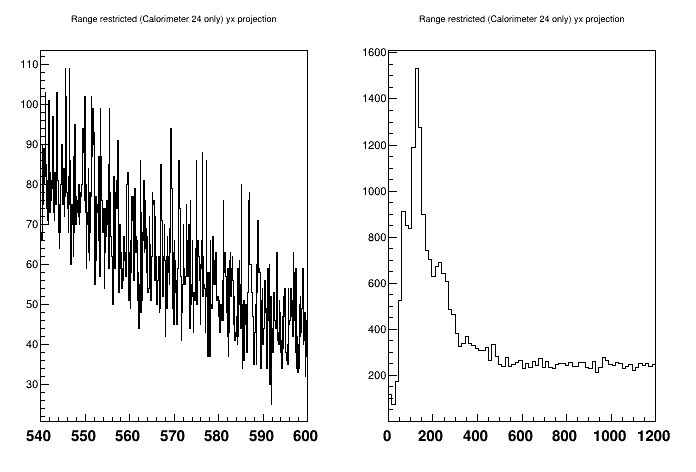

In [19]:
for calonum in range(1,len(calolist)+1):
    print("Processing calorimeter",calonum)
    threedhisti = f.corrected.Clone("threedhist_"+str(calonum))
    c = r.TCanvas()
    threedhisti.GetZaxis().SetRange(calonum,calonum)
    threedhisti.SetTitle("Range restricted (Calorimeter "+str(calonum)+" only)")
    #threedhisti.Draw()

    energytimehisti = threedhisti.Project3D("yx")
    energytimehisti.GetZaxis().SetRangeUser(1,10000)
#    energytimehisti.GetYaxis().SetRangeUser(1,1000)
    energytimehisti.Draw("COLZ")
        
    c.SetLogz()
    c.Draw()
    c.Print("./caloEnergyTime/energy2d/calo2D_"+str(format(calonum,'0>2'))+".png")
    
    c2 = r.TCanvas()
    energytimehisti.GetYaxis().SetRangeUser(1,1200)
    energytimehisti.GetXaxis().SetRangeUser(540,600)
    c2.Divide(2)
    c2.cd(1)
    energytimehisti.ProjectionX().Draw()
    c2.cd(2)
    energytimehisti.ProjectionY().Draw()
    c2.Draw()
    c2.Print("./caloEnergyTime/energy2d/calo2D_"+str(format(calonum,'0>2'))+"_projections.png")